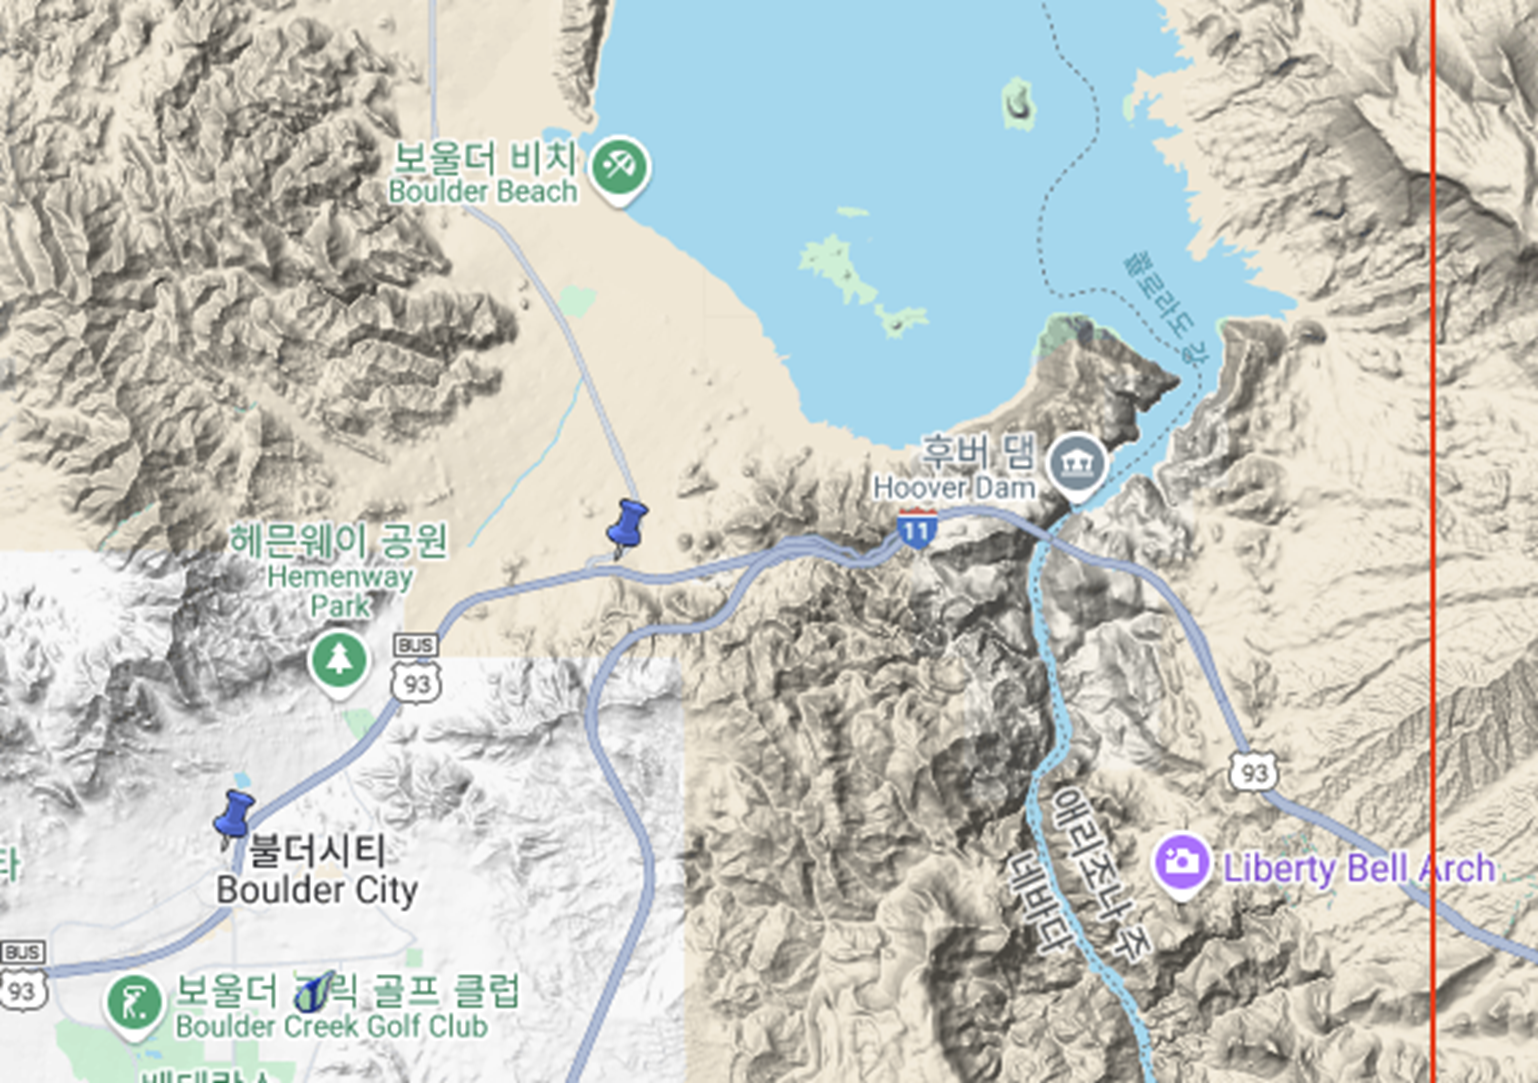

In [63]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [64]:
df_prec = pd.read_csv('Precipitation_in_Nevada.csv')
df_prec['Date'] = pd.to_datetime(df['Date'])
df_prec.rename(columns = {i:i.replace(' ', '') for i in df_prec.columns }, inplace=True)
for col in df_prec.columns[1:]:
    df_prec[col] = pd.to_numeric(df_prec[col], errors='coerce')


In [65]:
df_prec.sort_values('Date', inplace=True)

In [66]:
for col in df_prec.columns[1:]:
    fig = px.line(df_prec, 
                x='Date', 
                y=col, 
                title=f'{col} near Hoover Dam') 
    fig.update_layout(xaxis_title='Time', yaxis_title='Precipitation [?]')
    fig.write_html(f'Nevada_{col}.html')

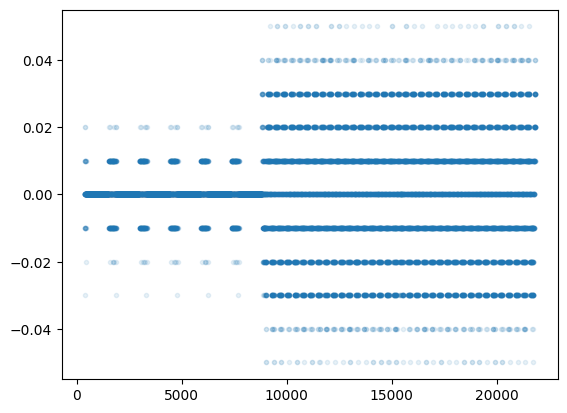

In [67]:
plt.plot(df_prec.diff(periods = 365)['PrecipitationNormal'], '.', alpha = 0.1)

In [68]:
start = pd.to_datetime('2014-05-01')
end = pd.to_datetime('2020-03-01')
df_prec = df_prec[df_prec['Date'].between(start, end)].reset_index(drop=True).loc[:,['Date','Precipitation']]
df_prec.head()

,Date,Precipitation
0,2014-05-01,0.0
1,2014-05-01,0.0
2,2014-05-02,NaN
3,2014-05-02,NaN
4,2014-05-03,NaN


In [69]:
df_prec.to_csv('precipitation_near_hoover_between_May2014_March2020.csv')